# IoU

In [1]:
import os
import numpy as np
import pickle
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import matplotlib.cm as cm
import matplotlib.patches as mpatches
import torch

from torchmetrics import JaccardIndex
from matplotlib.colors import ListedColormap
from tqdm import tqdm
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Load Split Indexes
train_indexes = np.load("./train_indexes.npy")
test_indexes = np.load("./test_indexes.npy")

print(f"train_indexes ({len(train_indexes)}): {train_indexes}")
print(f"test_indexes ({len(test_indexes)}): {test_indexes}")

FileNotFoundError: [Errno 2] No such file or directory: './train_indexes.npy'

In [ ]:
EPOCH = 500

In [ ]:
with open(f"./targets.p", "rb") as targets_file:
    targets = pickle.load(targets_file)
    targets = np.vstack([t.numpy() for t in targets])
    print(targets)

with open(f"./predictions/{EPOCH}.p", "rb") as prediction_file:
    predictions = pickle.load(prediction_file)
    predictions = np.array(predictions)
    print(predictions)

[[23.]
 [12.]
 [32.]
 [ 9.]
 [ 5.]
 [17.]
 [27.]
 [ 5.]
 [12.]
 [11.]
 [ 9.]
 [17.]
 [26.]
 [12.]
 [ 9.]
 [15.]
 [ 9.]
 [16.]
 [ 9.]
 [38.]
 [10.]
 [29.]
 [15.]
 [ 6.]
 [18.]
 [43.]
 [ 0.]
 [18.]
 [21.]
 [13.]
 [ 9.]
 [ 8.]
 [44.]
 [17.]
 [11.]
 [19.]
 [ 9.]
 [18.]
 [30.]
 [24.]
 [17.]
 [18.]
 [10.]
 [63.]
 [ 9.]
 [ 6.]
 [19.]
 [34.]
 [39.]
 [14.]
 [22.]
 [ 5.]
 [22.]
 [11.]
 [ 2.]
 [62.]
 [ 9.]
 [10.]
 [43.]
 [11.]
 [23.]
 [12.]
 [28.]
 [20.]
 [ 9.]
 [13.]
 [ 9.]
 [ 7.]
 [ 7.]
 [ 5.]
 [39.]
 [19.]
 [17.]
 [11.]
 [22.]
 [27.]
 [23.]
 [ 8.]]
[[21.]
 [ 5.]
 [14.]
 [11.]
 [10.]
 [ 9.]
 [40.]
 [10.]
 [13.]
 [11.]
 [18.]
 [15.]
 [37.]
 [11.]
 [11.]
 [15.]
 [36.]
 [23.]
 [ 7.]
 [ 9.]
 [14.]
 [18.]
 [ 9.]
 [17.]
 [14.]
 [38.]
 [ 8.]
 [13.]
 [15.]
 [18.]
 [ 5.]
 [10.]
 [30.]
 [18.]
 [ 2.]
 [20.]
 [ 6.]
 [22.]
 [33.]
 [16.]
 [30.]
 [16.]
 [15.]
 [32.]
 [20.]
 [ 8.]
 [26.]
 [26.]
 [33.]
 [15.]
 [19.]
 [16.]
 [20.]
 [ 4.]
 [ 4.]
 [18.]
 [16.]
 [21.]
 [27.]
 [ 9.]
 [30.]
 [ 4.]
 [13.]
 [14.]
 [10.

In [ ]:
# Calculate RMSE
rmse = np.sqrt(mean_squared_error(targets, predictions))

# Calculate R2 score
r2 = r2_score(targets, predictions)

print("RMSE:", rmse)
print("R2 score:", r2)

RMSE: 10.430478
R2 score: 0.28914847148898015


/tmp/ipykernel_1607845/3170230192.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap("viridis")


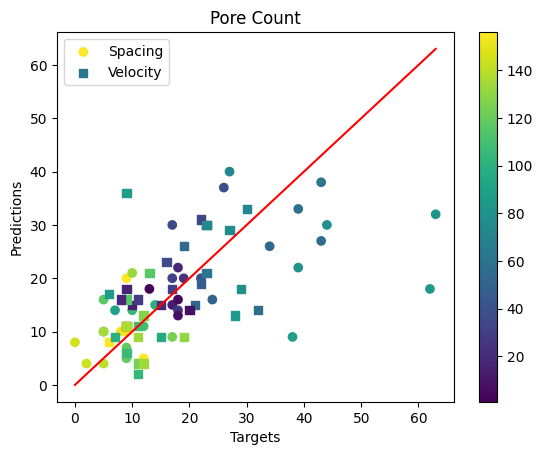

In [ ]:
# Create a plot
BUILD_LAYERS = 159
dataset_index = [divmod(layer_index, 159)[0] for layer_index in test_indexes]
dataset_markers = np.array(["o" if index == 0 else "s" for index in dataset_index])
colored_layers = np.array([divmod(layer_index, 159)[1] for layer_index in test_indexes])
cmap = cm.get_cmap("viridis")
# plt.scatter(targets, predictions, c=colored_layers, cmap=cmap, marker=dataset_markers)

unique_markers = np.unique(dataset_markers)  # or yo can use: np.unique(m)

x = targets.flatten()
y = predictions.flatten()

for marker in ["o", "s"]:
    mask = dataset_markers == marker
    # mask is now an array of booleans that can be used for indexing
    label = "Velocity"
    if (marker == "o"):
        label = "Spacing"
    plt.scatter(x[mask], y[mask], marker=marker, c=colored_layers[mask], cmap=cmap, label=label)

plt.plot([targets.min(), targets.max()], [targets.min(), targets.max()], 'r-')
plt.colorbar()

# Set labels and title
plt.xlabel('Targets')
plt.ylabel('Predictions')
plt.title('Pore Count')
plt.legend()

# Show plot
plt.show()